In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, KFold
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
import pickle

%matplotlib inline

# Takeaways

1. The accuracy is low (10%). Lower than expected. But probably not lower than should have been expected.
2. The model does a poor job of identifying great games, but those are flukey.
3. We seem to do best with a tree depth of 4.
4. Curiously, effectiveness of the model (with depth 4) peaks around 50 trees.


1 0.0961284049549456
2 0.10128790711185684
3 0.10052021086283199
4 0.10161611523557279
5 0.10298555412713976
6 0.10194625706556179
7 0.1019814306564472
8 0.10117273727221307
9 0.1025889749211119

In [50]:
df = pd.read_csv('./batter_training_set.csv', index_col=0)
df = df[['home',
 'Age_x',
 '#days_x',
 'BA',
 'OBP',
 'SLG',
 'OPS',
 'ERA',
 'PO',
 'BF',
 'Pit',
#  'Str',
#  'StL',
#  'StS',
#  'GB/FB',
#  'LD',
#  'PU',
 'WHIP',
 'BAbip',
 'SO9',
 'SO/W',
 'opp_hand',
 'VAL']]
df.dropna(inplace=True)
Y = df['VAL']
X = df.drop('VAL', axis=1)
X

x_train, x_test, y_train, y_test = train_test_split(X, Y)

1 0.05181735092485147
2 0.07569220526419948
3 0.09468042404086022
4 0.10041683324071624
5 0.10153228646956573
6 0.09947639702780875
7 0.09560392983195184
8 0.09208806060550297
9 0.08907497580513393


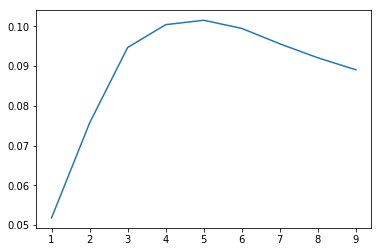

In [64]:
results = []
for i in range(1, 10):
    interim = []
    for k in range(5):
        RF = RandomForestRegressor(max_depth=i, n_estimators=i*10)
        model = RF.fit(x_train, y_train)
        interim.append(model.score(x_test, y_test))
    avg = sum(interim)/5
    print(i, avg)
    results.append([i, avg])
    
plt.plot([x[0] for x in results], [x[1] for x in results])

In [69]:
joblib.dump(model, 'rf_batter_model.pkl')

['rf_batter_model.pkl']

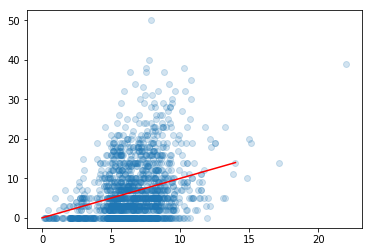

In [59]:
# for a, b in zip(model.predict(x_test), y_test):
#     print(a, b)

plt.scatter(model.predict(x_test), y_test, alpha=0.2)
plt.plot([x for x in range(15)], [x for x in range(15)], 'r')

In [77]:
df2 = pd.read_csv('./DKSalaries.csv')

conditions = []
for pos in df2['Roster Position'].unique():
    conditions.append((pos, df2[df2['Roster Position'] == pos]['AvgPointsPerGame'].mean()))
    

df2[]
# df2.head()
conditions

[('P', 4.480409356725147),
 ('OF', 3.6424590163934423),
 ('1B', 4.996428571428571),
 ('1B/3B', 5.242857142857143),
 ('2B/SS', 3.1983333333333337),
 ('SS', 2.8623529411764705),
 ('3B', 4.68625),
 ('2B/OF', 5.7325),
 ('1B/OF', 3.545),
 ('2B/3B', 4.566666666666666),
 ('C', 4.515833333333334),
 ('2B', 3.22),
 ('3B/SS', 5.23),
 ('C/3B', 4.57),
 ('1B/2B', 5.33),
 ('C/1B', 0.0),
 ('3B/OF', 0.0)]

,Position,Name + ID,Name,ID,Roster Position,Salary,Game Info,TeamAbbrev,AvgPointsPerGame
0,SP,Freddy Peralta (11235723),Freddy Peralta,11235723,P,9700,SF@MIL 09/09/2018 02:10PM ET,MIL,17.60
1,SP,Madison Bumgarner (11235500),Madison Bumgarner,11235500,P,9200,SF@MIL 09/09/2018 02:10PM ET,SF,16.95
2,SP,Michael Kopech (11235759),Michael Kopech,11235759,P,9000,LAA@CWS 09/09/2018 02:10PM ET,CWS,8.51
3,SP,Jimmy Nelson (11235620),Jimmy Nelson,11235620,P,8600,SF@MIL 09/09/2018 02:10PM ET,MIL,0.00
4,SP,Andrew Heaney (11235567),Andrew Heaney,11235567,P,8400,LAA@CWS 09/09/2018 02:10PM ET,LAA,16.42
5,SP,Carlos Rodon (11235673),Carlos Rodon,11235673,P,8300,LAA@CWS 09/09/2018 02:10PM ET,CWS,16.97
6,SP,Tyler Skaggs (11235559),Tyler Skaggs,11235559,P,8200,LAA@CWS 09/09/2018 02:10PM ET,LAA,16.59
7,SP,Johnny Cueto (11235475),Johnny Cueto,11235475,P,8100,SF@MIL 09/09/2018 02:10PM ET,SF,14.54
8,SP,Jhoulys Chacin (11235513),Jhoulys Chacin,11235513,P,8000,SF@MIL 09/09/2018 02:10PM ET,MIL,14.53
9,SP,Jose Berrios (11235698),Jose Berrios,11235698,P,8000,KC@MIN 09/09/2018 02:10PM ET,MIN,17.94
